In [1]:
import numpy as np

In [2]:
class AdalineGD(object):
    """적응형 선형 뉴런 분류기
    
    매개변수
    ----------
    eta : float
        학습률 (0.0과 1.0 사이)
    n_iter : int
        훈련 데이터셋 반복 횟수
    random_state : int
        가중치 무작위 초기화를 위한 난수 생성기 시드
        
    속성
    -----------
    w_ : 1d-array
        학습된 가중치
    cost_ : list
        에포크마다 누적된 비용 함수의 제곱합
        
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습
        
        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
            타겟 값
        
        반환값
        ----------
        self : object
        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """선형 활성화 계산"""
        return X
    
    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

df = pd.read_csv('iris.data', header=None, encoding='utf-8')
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1) # y 값이 Iris-setosa이면 -1, Iris-virginica이면 1
X = df.iloc[0:100, [0, 2]].values

C:\Users\e\AppData\Local\Temp\ipykernel_32280\1598668502.py:52: RuntimeWarning: overflow encountered in square
  cost = (errors**2).sum() / 2.0
c:\Users\e\anaconda3\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


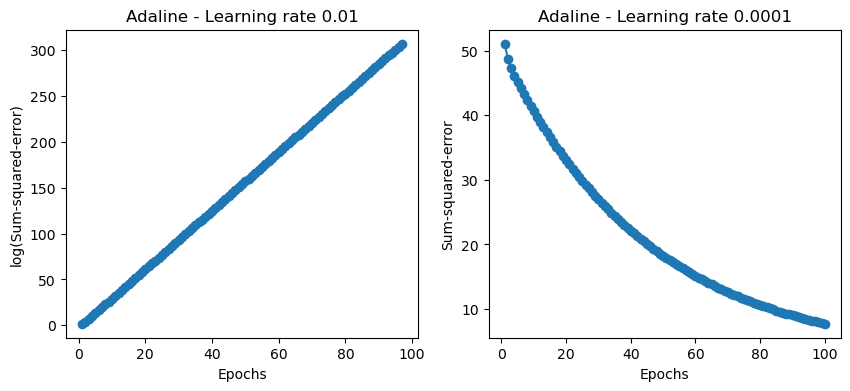

In [5]:
## 에포크와 횟수에 관한 차이
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=100, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=100, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그림
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그림
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

C:\Users\e\AppData\Local\Temp\ipykernel_32280\3794560843.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


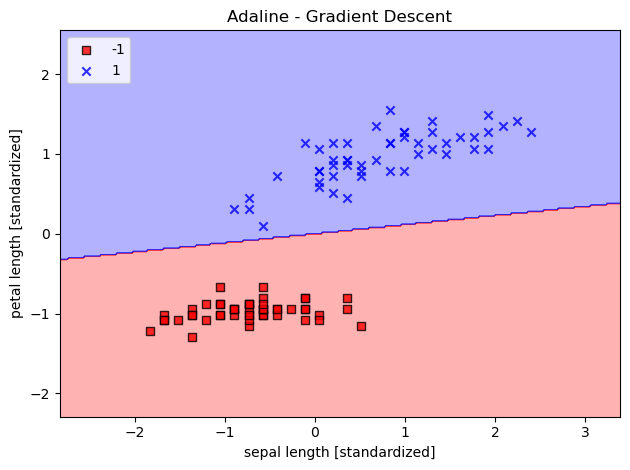

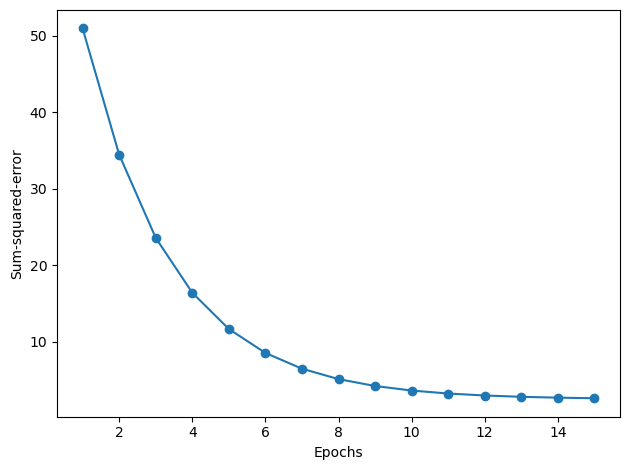

In [7]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:,0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:,1].std()

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

## 경사하강법
> 손실 함수의 값을 최소화하는 파라미터(가중치[w]와 편향[b])를 구하기 위해
<br>
>손실함수에 대한 각 매개변수의 기울기를 이용하는 방법


### 1. 배치 경사 하강법 (Batch Gradient Descent Method, BGD)
각 반복마다 모든 훈련 데이터셋을 처리하는 방법
1 iteration에 전체 데이터의 기울기 계산


### 2. 확률적 경사 하강법 (Stochastic Gradient Descent, SGD)
1 iteration에 하나의 데이터에 대해서만 기울기 계산하여 업데이트


### 3. 미니배치 경차 하강법 (Mini Batch Gradient Descen, MGD)
배치 경사 하강법과 확률적 경사 하강법보다 더 빠르게 작동하는 경사 하강법
전체 훈련 데이터셋을 여러 작은 그룹(Mini Batch)로 나눠서 진행

1 iteration에 하나의 미니 배치에 속해 있는 데이터에 대해 기울기를 구한 후 업데이트

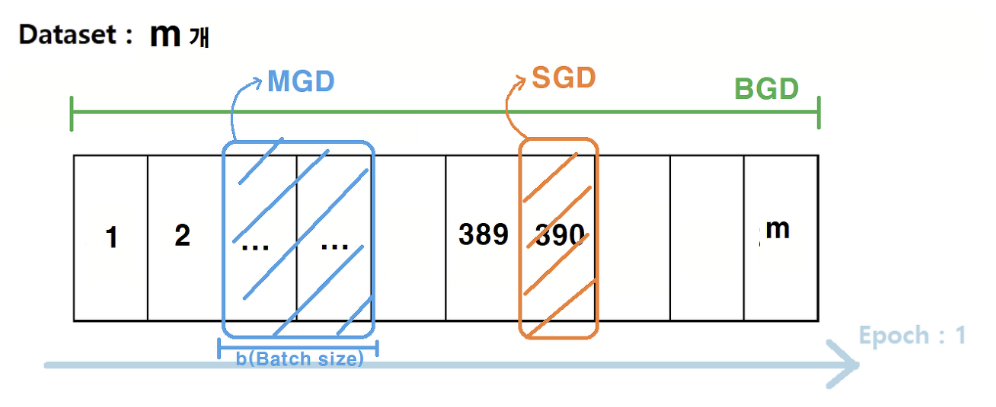




In [8]:
class AdalineGD(object):
    """ADAptive LInear NEuron 분류기
    
    매개변수
    ----------
    eta : float
        학습률 (0.0과 1.0 사이)
    n_iter : int
        훈련 데이터셋 반복 횟수
    shuffle : bool (default: True)
        True로 설정하면 같은 반복이 되지 않도록 에포크마다 훈련 데이터를 섞습니다
    random_state : int
        가중치 무작위 초기화를 위한 난수 생성기 시드
        
    속성
    -----------
    w_ : 1d-array
        학습된 가중치
    cost_ : list
        에포크마다 누적된 비용 함수의 제곱합
        
    """

    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습
        
        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
            타겟 벡터
        
        반환값
        ----------
        self : object
        """

        self._initialize_weights(X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """가중치를 다시 초기화하지 않고 훈련 데이터를 학습합니다"""
        if not self.w_initialized:
            self.w_initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """훈련 데이터를 섞습니다"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    def _initialize_weights(self, m):
        """랜덤한 작은 수로 가중치를 초기화합니다"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """아달린 학습 규칙을 적용하여 가중치를 업데이트합니다"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """선형 활성화 계산"""
        return X
    
    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [9]:
ada = AdalineGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

C:\Users\e\AppData\Local\Temp\ipykernel_32280\3794560843.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


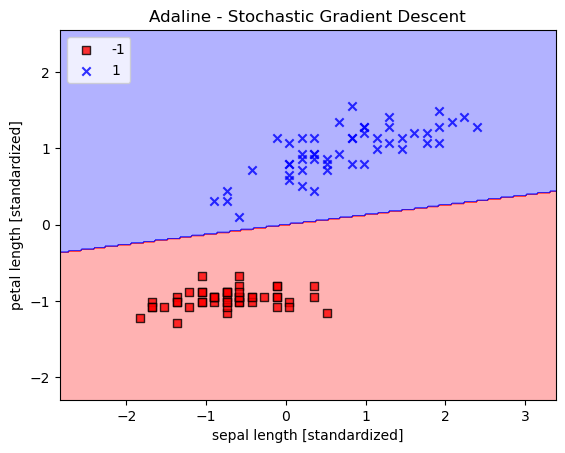

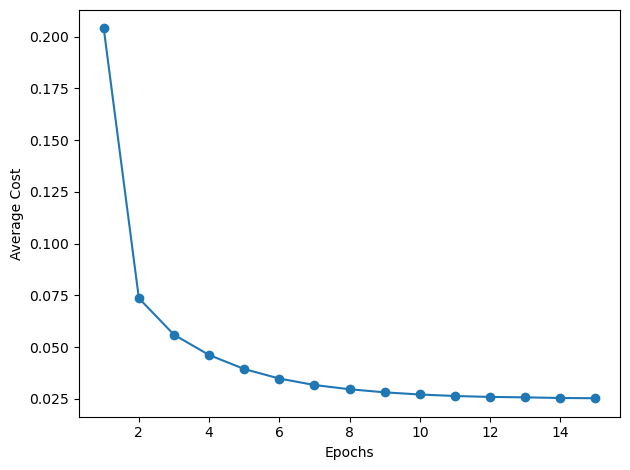

In [10]:
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()